In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

In [93]:
# Load data
df = pd.read_csv("/content/drive/MyDrive/projects/synthetic_financial_data.csv")

df.head()

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083


In [94]:
# Data Exploration
print(df.describe())

       transaction_id   customer_id   merchant_id        amount  \
count     10000.00000  10000.000000  10000.000000  10000.000000   
mean       5000.50000   1051.272300   2050.486600   4958.381617   
std        2886.89568     28.864062     28.877801   2899.699675   
min           1.00000   1001.000000   2001.000000     10.610000   
25%        2500.75000   1026.000000   2025.000000   2438.175000   
50%        5000.50000   1052.000000   2050.000000   4943.945000   
75%        7500.25000   1076.000000   2076.000000   7499.312500   
max       10000.00000   1100.000000   2100.000000   9999.750000   

       is_fraudulent  customer_age  
count   10000.000000  10000.000000  
mean        0.506800     44.047500  
std         0.499979     15.321707  
min         0.000000     18.000000  
25%         0.000000     31.000000  
50%         1.000000     44.000000  
75%         1.000000     57.000000  
max         1.000000     70.000000  


In [95]:
# Check for missing values
print(df.isnull().sum())

transaction_id             0
customer_id                0
merchant_id                0
amount                     0
transaction_time           0
is_fraudulent              0
card_type                  0
location                   0
purchase_category          0
customer_age               0
transaction_description    0
dtype: int64


In [96]:
# Fraudulent vs. Non-fraudulent Transactions
fraud_counts = df['is_fraudulent'].value_counts()
print(fraud_counts)

1    5068
0    4932
Name: is_fraudulent, dtype: int64


In [97]:
# Card Type Analysis
card_type_counts = df['card_type'].value_counts()
print(card_type_counts)

Discover            2633
American Express    2494
Visa                2490
MasterCard          2383
Name: card_type, dtype: int64


In [98]:
# Location Analysis
location_counts = df['location'].value_counts()
print(location_counts)

City-7     223
City-40    221
City-41    218
City-14    218
City-32    218
City-24    217
City-20    215
City-22    213
City-4     213
City-45    211
City-43    210
City-5     210
City-13    209
City-39    209
City-12    209
City-23    209
City-37    209
City-25    207
City-28    207
City-42    206
City-47    206
City-17    205
City-48    202
City-50    202
City-49    202
City-19    201
City-9     200
City-11    199
City-29    197
City-46    196
City-33    196
City-3     195
City-10    194
City-18    194
City-26    192
City-30    191
City-21    191
City-27    191
City-38    191
City-34    191
City-6     190
City-44    189
City-1     188
City-8     188
City-16    186
City-2     185
City-15    184
City-31    177
City-36    167
City-35    158
Name: location, dtype: int64


In [99]:
# Purchase Category Analysis
purchase_category_counts = df['purchase_category'].value_counts()
print(purchase_category_counts)

Travel             1694
Groceries          1692
Gas Station        1666
Retail             1661
Online Shopping    1651
Restaurant         1636
Name: purchase_category, dtype: int64


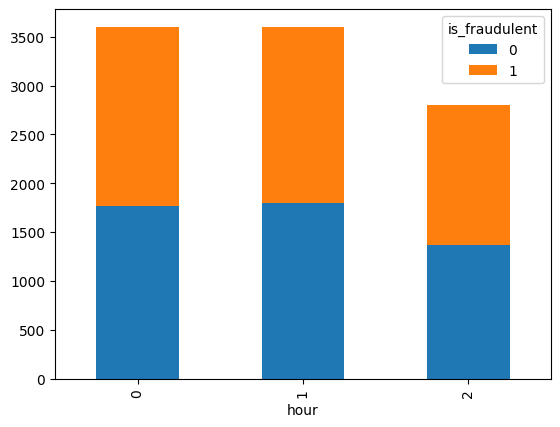

In [100]:
# Time-based Analysis
df['transaction_time'] = pd.to_datetime(df['transaction_time'])
df['hour'] = df['transaction_time'].dt.hour
hourly_counts = df.groupby('hour')['is_fraudulent'].value_counts().unstack().fillna(0)
hourly_counts.plot(kind='bar', stacked=True)
plt.show()

In [105]:
# Machine Learning Model (Random Forest)
# Assuming 'is_fraudulent' is the target variable
X = df.drop(['is_fraudulent', 'transaction_time'], axis=1)
y = df['is_fraudulent']

In [106]:
# Label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['card_type'] = le.fit_transform(X['card_type'])
X['location'] = le.fit_transform(X['location'])
X['purchase_category'] = le.fit_transform(X['purchase_category'])
# Convert categorical columns to numerical using label encoding
X['transaction_description'] = le.fit_transform(X['transaction_description'])


In [107]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [109]:
# Evaluate the model
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[481 485]
 [528 506]]
              precision    recall  f1-score   support

           0       0.48      0.50      0.49       966
           1       0.51      0.49      0.50      1034

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



In [110]:
# Anomaly Detection (Isolation Forest)
iso_forest = IsolationForest(contamination=0.01)
df['anomaly_score'] = iso_forest.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


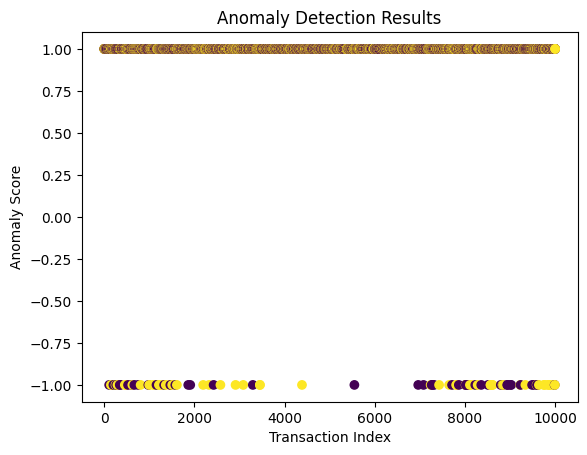

In [114]:
# Visualize anomalies
plt.scatter(df.index, df['anomaly_score'], c=df['is_fraudulent'], cmap='viridis')
plt.title('Anomaly Detection Results')
plt.xlabel('Transaction Index')
plt.ylabel('Anomaly Score')
plt.show()